## Random Forest
這邊我們看一個很重要的演算法，由decision tree延伸出來的random forest

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/matplotlib-1.5.0-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


事實上Random Forest是ensemble learning的應用，他是基於decison tree上做多數決的學習方法，下圖為decision tree的概念~

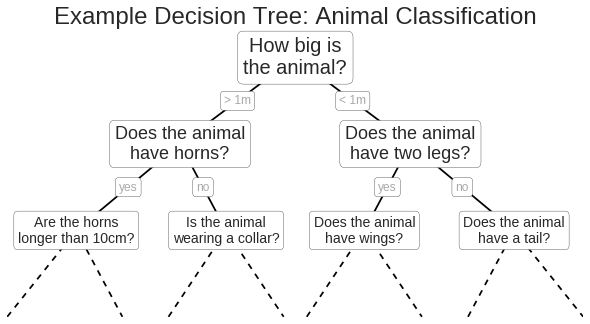

In [2]:
import fig_code
fig_code.plot_example_decision_tree()

在訓練decision tree的時候一個重要的步驟就是要"先問重要的問題"讓他能盡量分開不同類的data

## Creating a Decision tree

先隨機製造一些適合分類的data

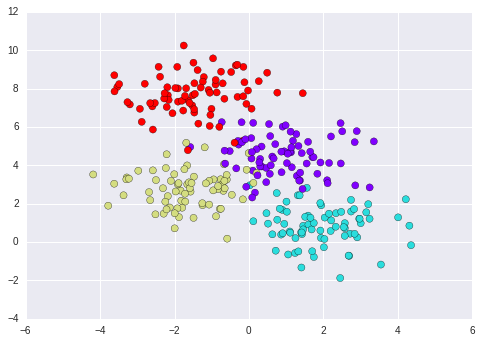

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [4]:
from fig_code import visualize_tree, plot_tree_interactive

None

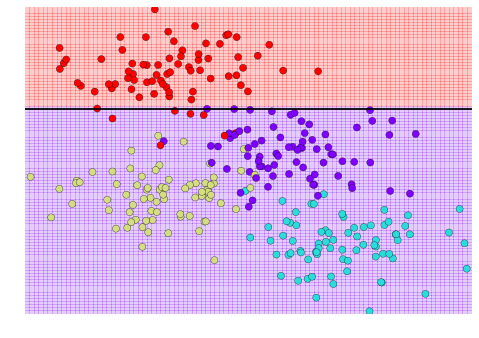

In [5]:
plot_tree_interactive(X, y);

注意隨著深度的增加每一的node都將分為兩邊，除非有node只包含某一特定class

Decision tree 也有一個性質是容易overfit，例如下面的例子

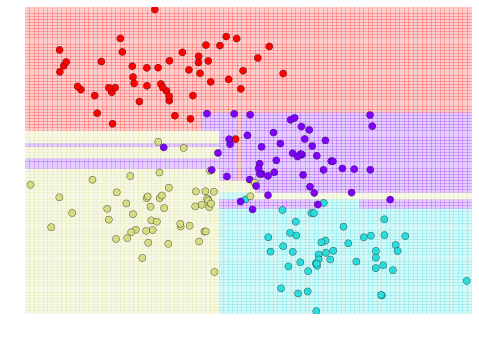

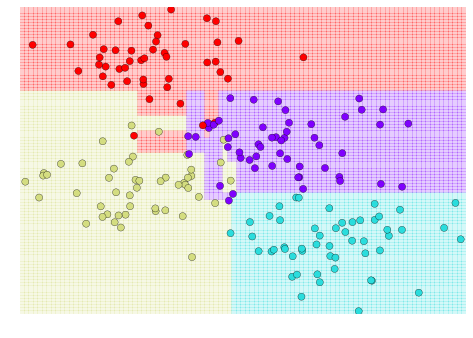

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

兩種分類結果相當不同，因此代表overfit的現象產生

## Ensembles of Estimators: Random Forests
Esemble 也是一種面對overfitting的方法，他去平均多個estimator(有可能overfit)來建構出另一個meta-estimator。實務上來說，使用這種方法可以得到更加robust的estimator!

Random Forest 就是其中著名的演算法，他是由decision tree建構出來的，我們來看以下在data加入一些擾動讓decision tree去分的例子：

None

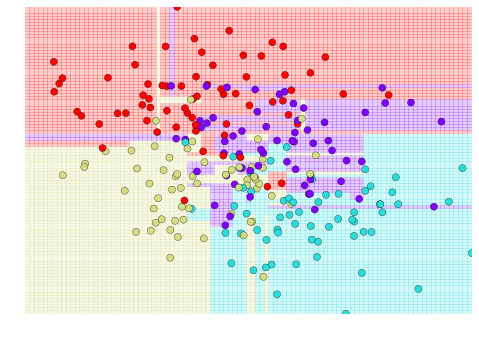

In [9]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

Random Forest 實際上會去把這些tree結合起來

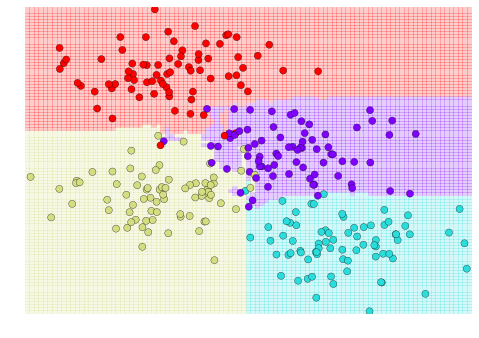

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False);

我們去average 100個不同的decision tree得到的結果相當不錯

## Random Forest for Classifying Digits

來看看random forest對digit set的效果~

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [11]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


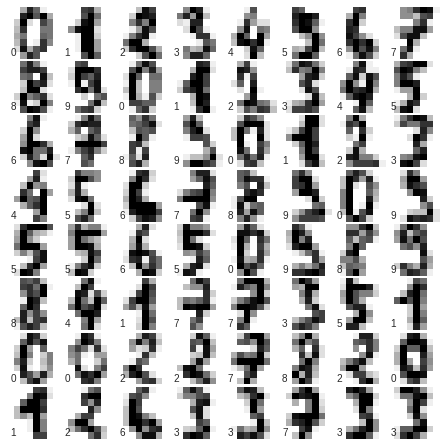

In [12]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

實際分類開始:

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [ ]:
看看結果和confusion mart

In [14]:
metrics.accuracy_score(ypred, ytest)

0.83111111111111113

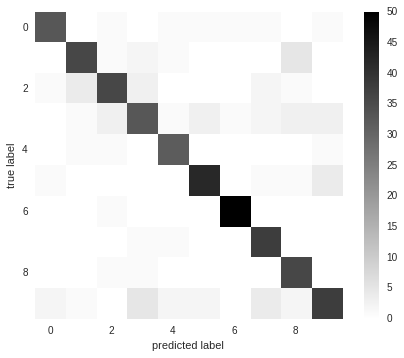

In [15]:
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");